In [ ]:
import numpy as np
import matplotlib.pylab as plt

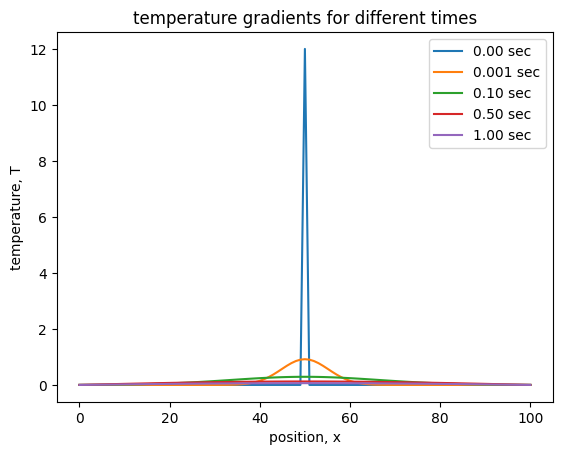

In [ ]:
L = 0.005     # glass thickness [m]
D = 10 * 0.34e-6   # thermal diffusivity m^2/s (x1, x10)
N = 100       # space grid dimension
a = L/N       # space grid interval [m]
h = 1e-4      # time grid interval [s]

Tlo = 0.0     # low air temp [deg C]
Tmi = 12.0    # intial glass temp [deg C] (=0, =12, =24)
Thi = 0.0    # hgh air temp [deg C]

T = np.zeros(N+1,float) # temp array
T[0] = Thi   # glass hot side BC
T[N] = Tlo   # glass cold side BC
#T[1:N] = Tmi # glass temperature IC
T[N//2:N//2+1] = Tmi # also try
#T[1:N:8], T[5:N:8] = Tmi, -Tmi #also try
plt.plot(T,label="0.00 sec")

Tp = np.zeros(N+1,float) # primed temp array
Tp[0] = Thi
Tp[N] = Tlo

t1, t2, t3, t4, t5, t6 = 0.01, 0.1, 0.5, 1.0, 2.0, 10. # helpers for plotting temperature gradient
epsilon = 1e-2*h # helps make plots of temperature gradients
tend = t4+epsilon

t = 0.0 # clock
c = h*D/(a*a) # scale factor for heat flow depending on a, h, D

while t < tend:

    for i in range(1,N): # look of space coordinate for given time
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i]) # leap frog method

    T,Tp = Tp,T # update array T for new time
    t += h      # increment clock

    # Make plots at the given times
    if abs(t-t1) < epsilon:
        plt.plot(T,label="0.001 sec")
    if abs(t-t2) < epsilon:
        plt.plot(T,label="0.10 sec")
    if abs(t-t3) < epsilon:
        plt.plot(T,label="0.50 sec")
    if abs(t-t4) < epsilon:
        plt.plot(T,label="1.00 sec")
    if abs(t-t5) < epsilon:
        plt.plot(T,label="2.0 sec")
    if abs(t-t6) < epsilon:
        plt.plot(T,label="10.0 sec")

plt.title("temperature gradients for different times")
plt.xlabel("position, x")
plt.ylabel("temperature, T")
plt.legend()
